<a href="https://colab.research.google.com/github/aditipandey37/burnout-productivity-analysis/blob/main/burnout_productivity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
print("Libraries imported sucessfully")

Libraries imported sucessfully


In [5]:
df= pd.read_csv("/content/synthetic_employee_burnout.csv")

In [ ]:
df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                2000 non-null   int64  
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         2000 non-null   int64  
 5   WorkHoursPerWeek   2000 non-null   int64  
 6   RemoteRatio        2000 non-null   int64  
 7   SatisfactionLevel  2000 non-null   float64
 8   StressLevel        2000 non-null   int64  
 9   Burnout            2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


In [ ]:
df.describe()

,Age,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,40.694500,10.074500,49.588000,49.973000,2.995230,5.43200,0.064500
std,11.286756,9.148267,11.832424,29.151298,1.155431,2.88089,0.245703
min,22.000000,0.000000,30.000000,0.000000,1.000000,1.00000,0.000000
25%,31.000000,3.000000,39.000000,24.000000,2.000000,3.00000,0.000000
50%,41.000000,7.000000,49.000000,49.000000,3.025000,5.00000,0.000000
75%,50.000000,15.000000,60.000000,75.000000,4.000000,8.00000,0.000000
max,60.000000,39.000000,70.000000,100.000000,5.000000,10.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
JobRole,0
Experience,0
WorkHoursPerWeek,0
RemoteRatio,0
SatisfactionLevel,0
StressLevel,0
Burnout,0


In [ ]:
df.duplicated().sum()

np.int64(0)

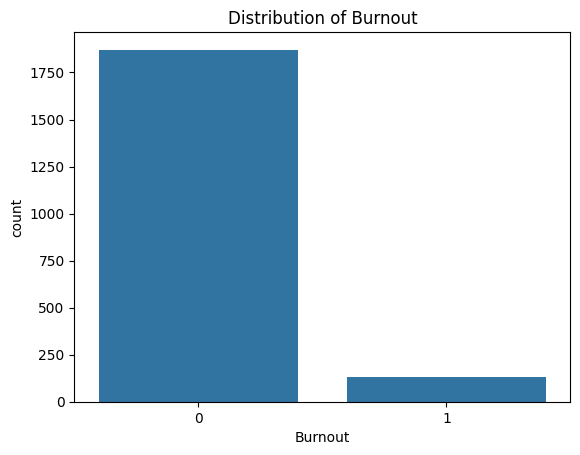

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The correct way for binary/categorical data
sns.countplot(data=df, x="Burnout")
plt.title("Distribution of Burnout")
plt.show()

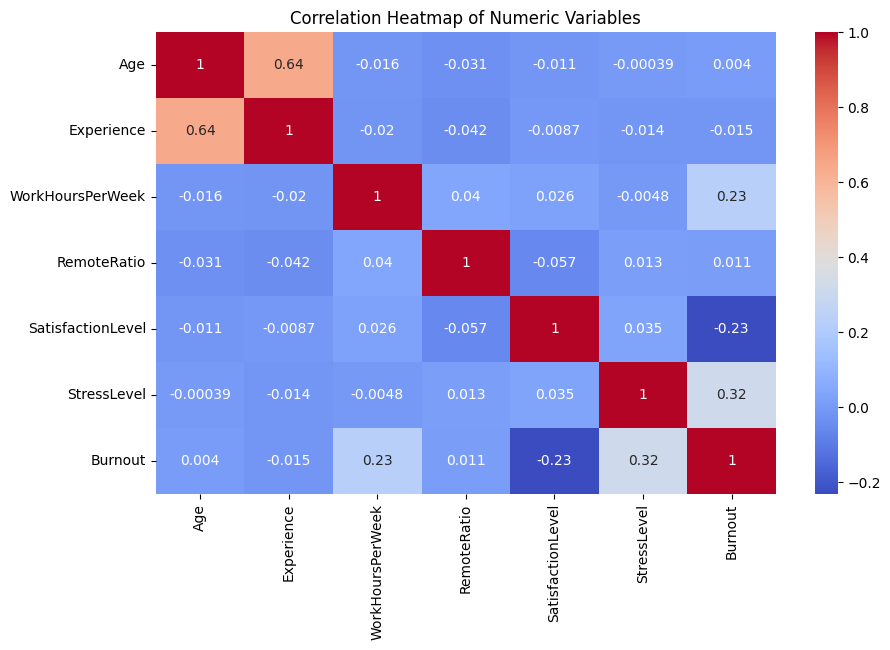

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))

# ADD numeric_only=True HERE
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Name', 'Gender', 'JobRole'], dtype='object')


In [9]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'JobRole', 'Experience', 'WorkHoursPerWeek',
       'RemoteRatio', 'SatisfactionLevel', 'StressLevel', 'Burnout'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Burnout'] = le.fit_transform(df['Burnout'])
print(df['Burnout'].head())


0    0
1    0
2    0
3    0
4    0
Name: Burnout, dtype: int64


In [11]:
print(df['Burnout'].unique())


[0 1]


In [12]:
df = df.drop('Name', axis=1)


In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'JobRole'], drop_first=True)


In [14]:
print(df_encoded.info())
print(df_encoded.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2000 non-null   int64  
 1   Experience         2000 non-null   int64  
 2   WorkHoursPerWeek   2000 non-null   int64  
 3   RemoteRatio        2000 non-null   int64  
 4   SatisfactionLevel  2000 non-null   float64
 5   StressLevel        2000 non-null   int64  
 6   Burnout            2000 non-null   int64  
 7   Gender_Male        2000 non-null   bool   
 8   JobRole_Engineer   2000 non-null   bool   
 9   JobRole_HR         2000 non-null   bool   
 10  JobRole_Manager    2000 non-null   bool   
 11  JobRole_Sales      2000 non-null   bool   
dtypes: bool(5), float64(1), int64(6)
memory usage: 119.3 KB
None
Age                  0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout          

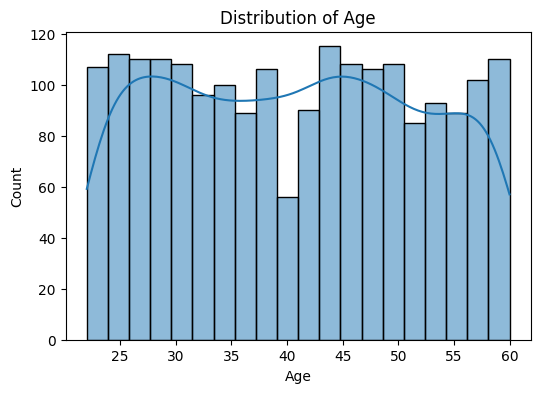

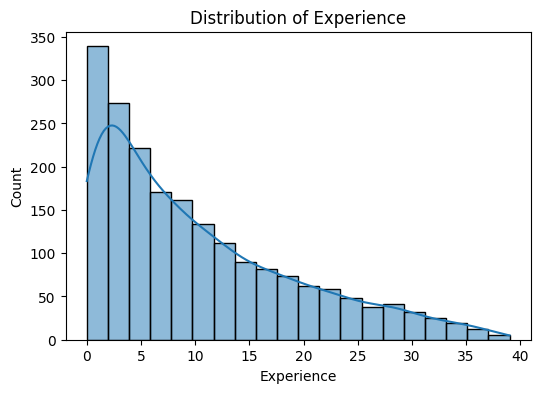

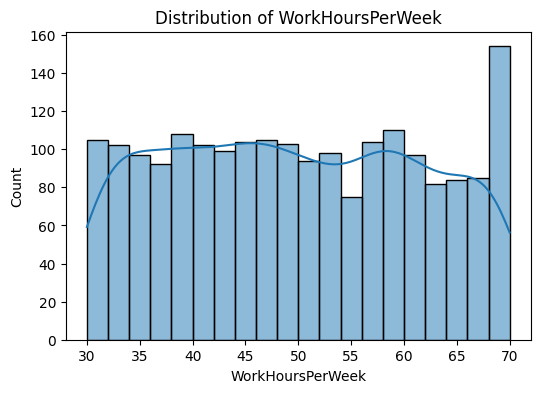

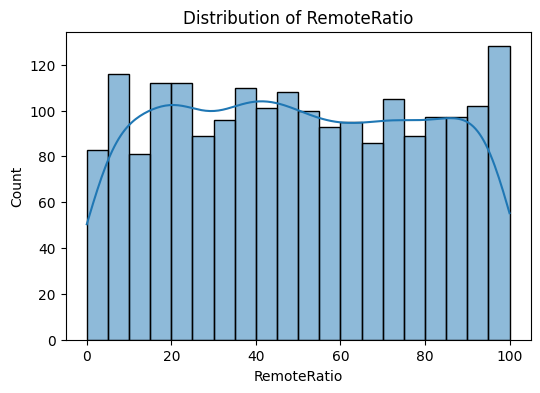

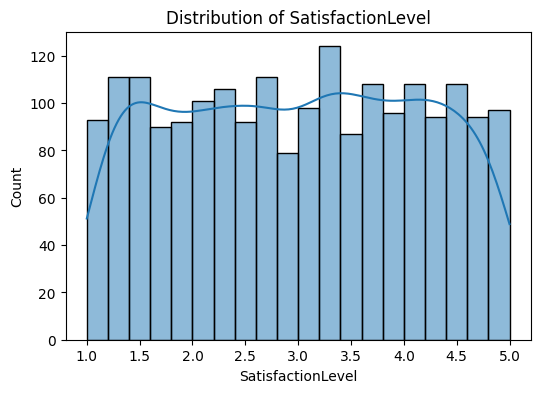

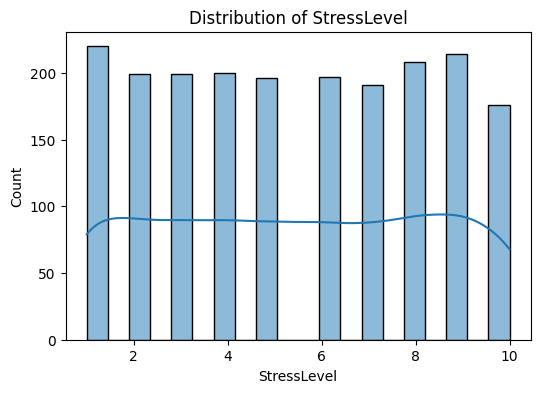

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Burnout', errors='ignore')  # exclude target if present

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_encoded[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


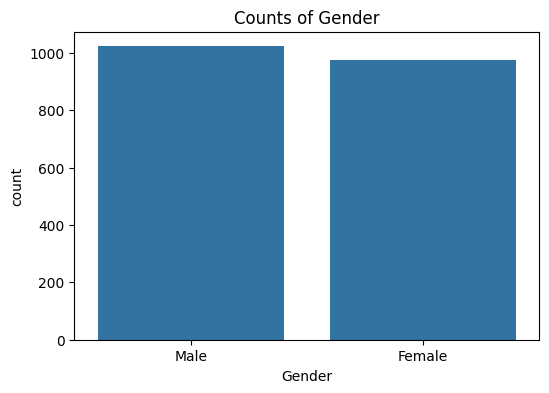

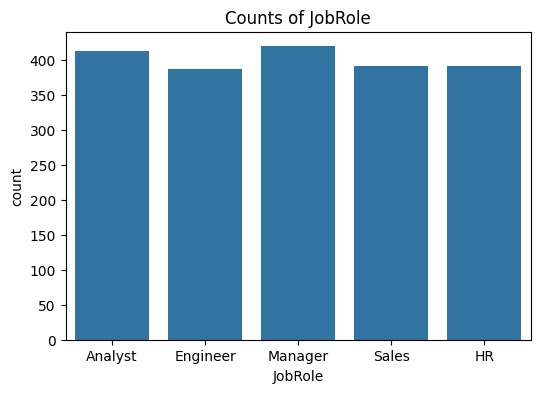

In [16]:
categorical_cols = ['Gender', 'JobRole']  # original names
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Counts of {col}')
    plt.show()


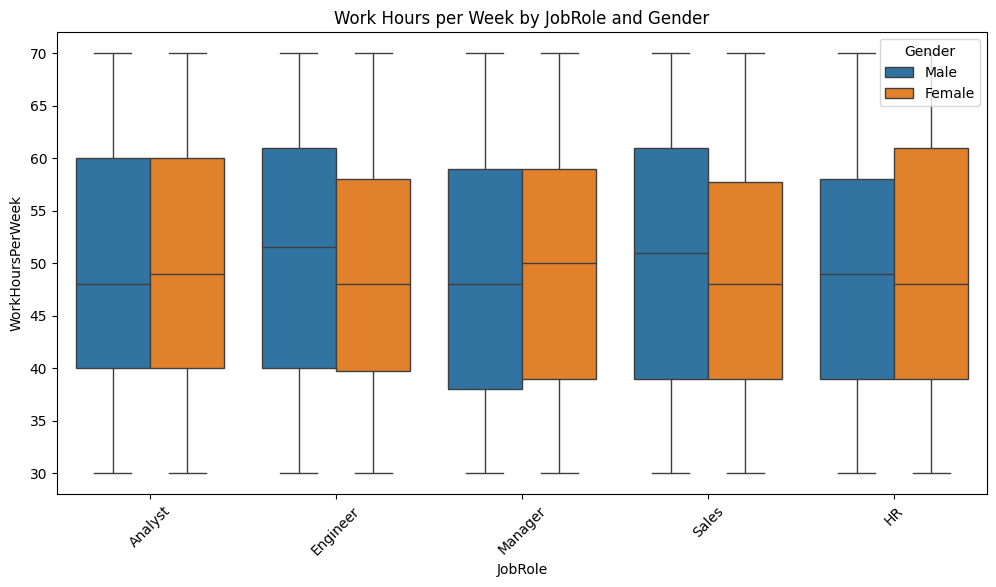

In [18]:
#Production vs JobRole / Gender
plt.figure(figsize=(12,6))
sns.boxplot(x='JobRole', y='WorkHoursPerWeek', hue='Gender', data=df)
plt.title("Work Hours per Week by JobRole and Gender")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend(title='Gender')
plt.show()


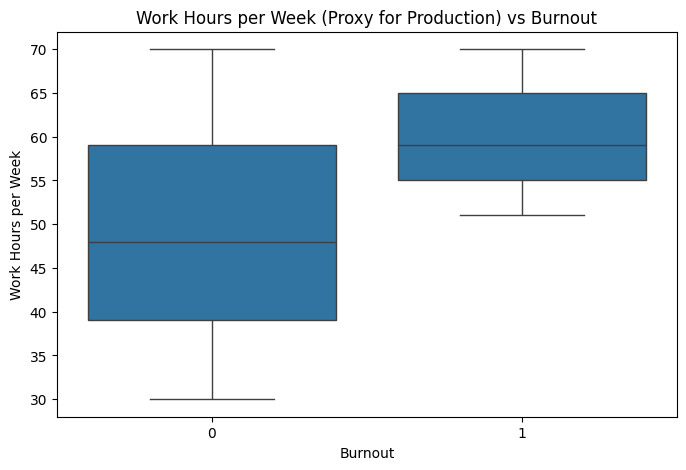

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Burnout', y='WorkHoursPerWeek', data=df)
plt.title("Work Hours per Week (Proxy for Production) vs Burnout")
plt.xlabel("Burnout")
plt.ylabel("Work Hours per Week")
plt.show()


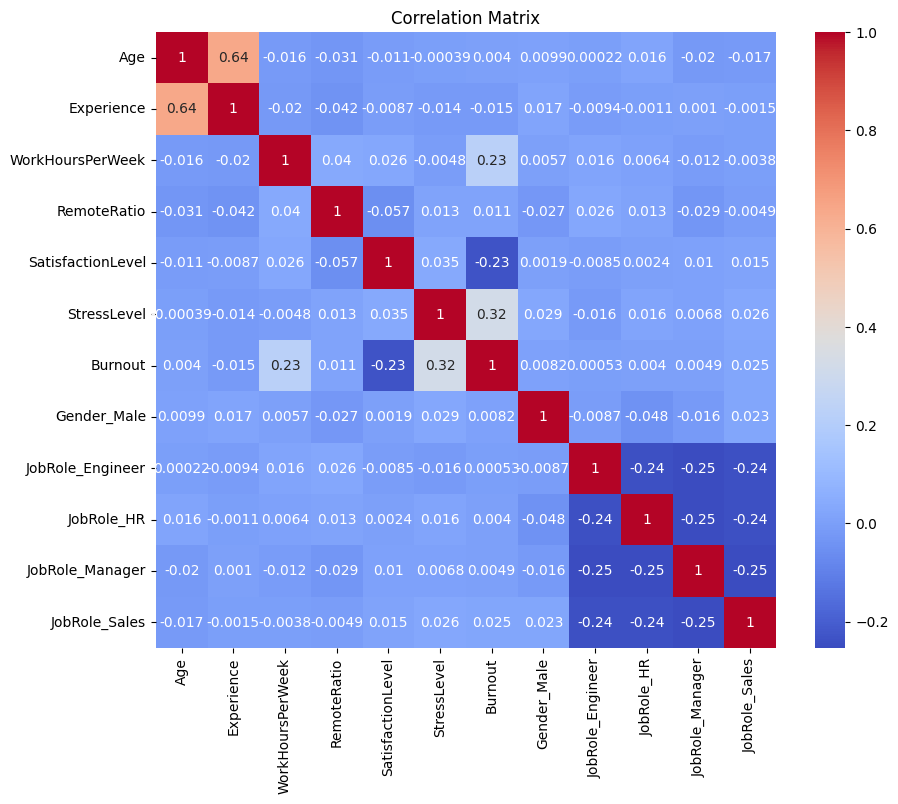

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
